# TABLE OF CONTENTS

## 1. PROBLEM DESCRIPTION

In our Python group project revolving around IMDb Non-Commercial Datasets, we delve into a similar journey of data exploration and utilization. Our project centers around accessing subsets of IMDb data, tailored for personal and non-commercial use by customers. The dataset repository offers various subsets of IMDb data, each meticulously crafted and structured to facilitate analysis and exploration. Our objective is to harness these datasets to extract valuable insights and trends within the realm of IMDb content. The project encompasses a myriad of datasets, each offering unique perspectives and facets of IMDb content, ranging from title details to cast and crew information, and user ratings. With each dataset encapsulating valuable information, our aim is to unravel the intricacies of IMDb content and unveil noteworthy patterns and trends within the realm of entertainment.

## 2. THE DATA

IMDb, short for Internet Movie Database, is a comprehensive online database that was launched in 1990 and has been a subsidiary of Amazon.com since 1998. It stands as the most popular and authoritative source for movie, TV, and celebrity content, providing a platform for fans to explore the world of entertainment and make informed decisions about what to watch.

The database boasts millions of entries, including movies, TV shows, entertainment programs, and information about cast and crew members.

Data Location:

The dataset files are available for download from https://datasets.imdbws.com/. The data is updated daily to ensure relevance and accuracy.

Main datasets:

1. title.basics.tsv

* tconst (string) - alphanumeric unique identifier of the title
* titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
* primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* originalTitle (string) - original title, in the original language
* isAdult (boolean) - 0: non-adult title; 1: adult title
* startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
* runtimeMinutes – primary runtime of the title, in minutes
* genres (string array) – includes up to three genres associated with the title

2. title.ratings.tsv
* tconst (string): Alphanumeric unique identifier of the title.
* averageRating: Weighted average of all individual user ratings for the title.
* numVotes: Number of votes the title has received.

3. name.basics.tsv
* nconst (string): Alphanumeric unique identifier of the name/person.
* primaryName: Name by which the person is most often credited.
* birthYear: Year of birth in YYYY format.
* deathYear: Year of death in YYYY format if applicable; otherwise '\N'.
* primaryProfession (array of strings): Top-3 professions of the person.
* knownForTitles (array of tconsts): Titles the person is known for.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [95]:
# Reading the dataset "title_basics"

title_basics_data = pd.read_csv('data/title_basics_data.tsv', sep='\t')

title_basics_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [96]:
# Summary of the "title_basics" dataset

title_basics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1048575 non-null  object
 1   titleType       1048575 non-null  object
 2   primaryTitle    1048574 non-null  object
 3   originalTitle   1048574 non-null  object
 4   isAdult         1048575 non-null  int64 
 5   startYear       1048575 non-null  object
 6   endYear         1048575 non-null  object
 7   runtimeMinutes  1048575 non-null  object
 8   genres          1048575 non-null  object
dtypes: int64(1), object(8)
memory usage: 72.0+ MB


In [97]:
# Reading the dataset "name_basics"

name_basics_data = pd.read_csv('data/name_basics_data.tsv', sep='\t')

name_basics_data.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050976,tt0050986"


In [98]:
# Reading the dataset "title_ratings"

title_ratings_data = pd.read_csv('data/title_ratings_data.tsv', sep='\t')

title_ratings_data.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2032
1,tt0000002,5.7,272
2,tt0000003,6.5,1973
3,tt0000004,5.4,178
4,tt0000005,6.2,2731


## 3. BACKGROUND RESEARCH

These datasets offer subsets of IMDb data accessible to customers for personal and non-commercial use, providing valuable insights into diverse facets of IMDb content, such as titles, cast and crew details, and user ratings.

- Title Basics Dataset: Contains over 1 million entries (1,048,575), each uniquely identified by an alphanumeric code (tconst). Provides details such as title type/format, primary and original titles, adult content indicator, start and end years, runtime duration, and associated genres.
- Name Basics Dataset: Also comprises over 1 million entries (1,048,575), with each entry identified by an alphanumeric code (nconst). Includes information about the primary name of individuals, birth and death years, primary professions, and titles they are known for.
- Title Ratings Dataset: Consists of more than 1 million entries (1,048,575), identified by an alphanumeric code (tconst). Contains data on the average rating and number of votes received for each title.

Upon researching each of the aforementioned topics and scrutinizing the associated metadata file for each dataset, the following conclusions can be drawn:

* Identification of the top 10 movies by decade.
* Compilation of the top 10 actors based on the highest number of appearances in movies and their ratings.
* Determination of the top 10 rated movies, considering both ratings and the number of votes received.
* Analysis of the most prevalent genres across the IMDb database.

## 4. READ IN THE DATA

Let's read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on. 

In [99]:
data_files = [
    "title_basics_data.tsv",
    "title_ratings_data.tsv",
    "name_basics_data.tsv"
]

imdb_data = {}

for file in data_files:
    d = pd.read_csv("data/{0}".format(file), sep='\t')
    key = file.replace(".tsv", "")
    imdb_data[key] = d

### A. Data Selection

We'll have to filter the data to remove the unnecessary one "runtimeMinutes" in the title_basics_data. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.

In [100]:
# Removing the column : "runtimeMinutes"

imdb_data["title_basics_data"] = imdb_data["title_basics_data"].drop(columns=["runtimeMinutes"])

## 5. GETTING TO KNOW THE DATA

In [101]:
for key, value in imdb_data.items():
    print("\n\033[1m", key, "\033[0m")
    display(value.head())    


 title_basics_data 


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short"



 title_ratings_data 


,tconst,averageRating,numVotes
0,tt0000001,5.7,2032
1,tt0000002,5.7,272
2,tt0000003,6.5,1973
3,tt0000004,5.4,178
4,tt0000005,6.2,2731



 name_basics_data 


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050976,tt0050986"


The primary key in each dataset is as follows:

- title_basics_data: Primary Key: tconst

- name_basics_data: Primary Key: nconst

- title_ratings_data: Primary Key: tconst


To combine the three datasets, we can perform a merge operation based on the common key, which is "tconst" in both the title basics dataset and the title ratings dataset.

We can then merge the resulting DataFrame with the name basics dataset based on the common key "tconst", which will be extracted from the "knownForTitles" column in name_basics_data. We'll split the comma-separated values in the "knownForTitles" column of the name_basics_data dataset and explode them into separate rows. This transformation ensures that each 'tconst' value appears in its own row, facilitating the merge operation.

This merge combines information from all three datasets, resulting in a single DataFrame that contains comprehensive information about titles, ratings, and cast/crew members.

# 5. Getting to know the data

## 5.1 Dataframe 'title_basics_data'

In [102]:
imdb_data['title_basics_data'].head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short"


### Column 'isAdult'

In [103]:
#display(imdb_data['title_basics_data']['isAdult'].value_counts())
round(imdb_data['title_basics_data']['isAdult'].value_counts(normalize=True),4)

isAdult
0    0.9592
1    0.0408
Name: proportion, dtype: float64

There are only 4.08% of movies in df 'title_basics_data' classified for only adults.

### Columns 'startYear'

In [104]:
imdb_data['title_basics_data']['startYear']

0          1894
1          1892
2          1892
3          1892
4          1893
           ... 
1048570    2011
1048571    2019
1048572    2013
1048573    2013
1048574    2004
Name: startYear, Length: 1048575, dtype: object

## 5.2 Dataframe 'title_ratings_data'

In [105]:
imdb_data['title_ratings_data'].head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2032
1,tt0000002,5.7,272
2,tt0000003,6.5,1973
3,tt0000004,5.4,178
4,tt0000005,6.2,2731


### Column 'Average rating'

In [106]:
imdb_data['title_ratings_data']['averageRating'].describe().apply(lambda x: format(round(x,2), ','))

count    1,048,575.0
mean            6.91
std             1.38
min              1.0
25%              6.2
50%              7.1
75%              7.8
max             10.0
Name: averageRating, dtype: object

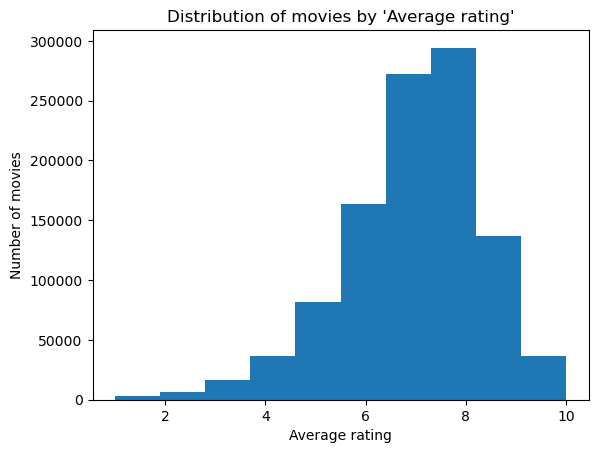

In [107]:
imdb_data['title_ratings_data']['averageRating'].plot(kind= 'hist',xlabel= 'Average rating', ylabel = 'Number of movies', title = "Distribution of movies by 'Average rating'")
plt.show()

The distribution of the values of 'Average rating' column is left-skewed. And its median is 7.1.

### Column 'Number of votes'

In [108]:
imdb_data['title_ratings_data']['numVotes'].describe().apply(lambda x: format(int(x), ','))

count    1,048,575
mean         1,153
std         19,494
min              5
25%             12
50%             28
75%            107
max      2,865,377
Name: numVotes, dtype: object

The number of votes for the 4th quantile of movies is within 107 and 2,865,377 votes.

## 5.3 Dataframe 'name_basics_data'

### Column 'birthYear'

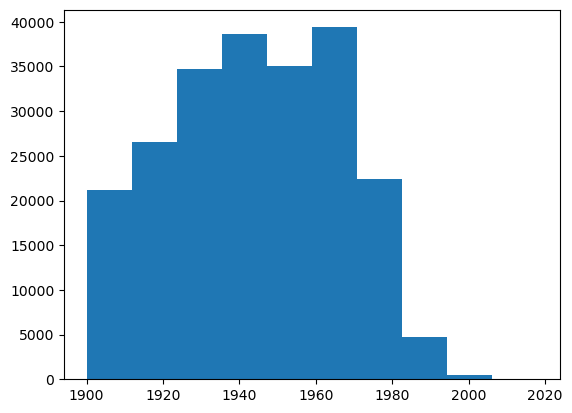

In [109]:
birthyear=  pd.to_numeric(imdb_data['name_basics_data']['birthYear'], errors='coerce').dropna()
plt.hist(birthyear[birthyear>=1900])
plt.show()

The most frequent decades of birth of workers stored in the dataframe are:

In [110]:
birthyear_decade = (birthyear[birthyear>=1900]//10*10)
birthyear_decade.value_counts().head()

birthYear
1940.0    33640
1960.0    32809
1950.0    31380
1930.0    29051
1920.0    28123
Name: count, dtype: int64

### Column 'primaryProfession'

The most frequent professions are:

In [111]:
proffession = imdb_data['name_basics_data']['primaryProfession'].str.split(',', expand=True).stack().reset_index(drop=True)
proffession.value_counts()[:10]

actor                353678
actress              214971
miscellaneous        134326
writer               122557
producer             116475
director              87240
camera_department     65885
art_department        51083
soundtrack            44794
sound_department      34284
Name: count, dtype: int64

### Column 'name_basics_data'

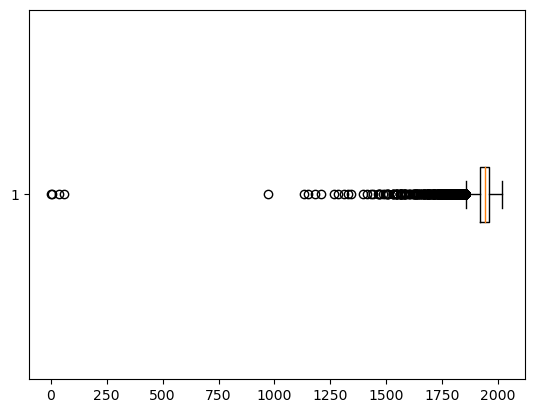

In [112]:
birthyear = pd.to_numeric(imdb_data['name_basics_data']['birthYear'], errors= 'coerce').dropna()
plt.boxplot(birthyear, vert=False)
plt.show()

# 6. Data preparation

## 6.1 Create calculated columns

### Spliting the key for 'title_basics_data'

In [116]:
df_titles = imdb_data['title_basics_data']
key_titles = df_titles['genres'].str.split(',', expand=True)
key_titles.columns = ['key1','key2','key3']
key_titles

,key1,key2,key3
0,Documentary,Short,None
1,Animation,Short,None
2,Animation,Comedy,Romance
3,Animation,Short,None
4,Comedy,Short,None
...,...,...,...
1048570,Drama,None,None
1048571,Short,None,None
1048572,Comedy,None,None
1048573,Comedy,None,None


In [119]:
df_titles = pd.concat([df_titles,key_titles],axis=1)
df_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,key1,key2,key3
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short",Documentary,Short,None
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short",Animation,Short,None
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance",Animation,Comedy,Romance
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short",Animation,Short,None
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short",Comedy,Short,None


### Calculating decade of the movie

In [127]:
decades =  pd.to_numeric(df_titles['startYear'], errors = 'coerce')
decades = decades.apply(lambda x: int(x) if pd.notna(x) else 0)
df_titles['startDecade'] = decades
df_titles


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,genres,key1,key2,key3,startDecade
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,"Documentary,Short",Documentary,Short,None,1894
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,"Animation,Short",Animation,Short,None,1892
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,"Animation,Comedy,Romance",Animation,Comedy,Romance,1892
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,"Animation,Short",Animation,Short,None,1892
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,"Comedy,Short",Comedy,Short,None,1893
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,tt10146152,tvEpisode,Episode #1.200,Episode #1.200,0,2011,\N,Drama,Drama,None,None,2011
1048571,tt10146154,short,The Cube,The Cube,0,2019,\N,Short,Short,None,None,2019
1048572,tt10146156,tvEpisode,Beanyx - První kompilace,Beanyx - První kompilace,0,2013,\N,Comedy,Comedy,None,None,2013
1048573,tt10146158,tvEpisode,Beanyx - Kdo mi sezral susenky!?,Beanyx - Kdo mi sezral susenky!?,0,2013,\N,Comedy,Comedy,None,None,2013


### Spliting the key for 'name_basics_data'

In [117]:
df_names = imdb_data['name_basics_data']
key_names = df_names['knownForTitles'].str.split(',', expand=True)
key_names.columns = ['key1','key2','key3','key4','key5','key6','key7']
key_names

,key1,key2,key3,key4,key5,key6,key7
0,tt0027125,tt0050419,tt0053137,tt0072308,None,None,None
1,tt0038355,tt0037382,tt0075213,tt0117057,None,None,None
2,tt0049189,tt0054452,tt0056404,tt0057345,None,None,None
3,tt0078723,tt0080455,tt0072562,tt0077975,None,None,None
4,tt0083922,tt0069467,tt0050976,tt0050986,None,None,None
...,...,...,...,...,...,...,...
1048570,tt9028956,None,None,None,None,None,None
1048571,tt9013146,tt9490002,None,None,None,None,None
1048572,tt4368588,None,None,None,None,None,None
1048573,\N,None,None,None,None,None,None


In [118]:
df_names = pd.concat([df_names,key_names],axis=1)
df_names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,key1,key2,key3,key4,key5,key6,key7
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0027125,tt0050419,tt0053137,tt0072308",tt0027125,tt0050419,tt0053137,tt0072308,None,None,None
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0075213,tt0117057",tt0038355,tt0037382,tt0075213,tt0117057,None,None,None
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345",tt0049189,tt0054452,tt0056404,tt0057345,None,None,None
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975",tt0078723,tt0080455,tt0072562,tt0077975,None,None,None
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0069467,tt0050976,tt0050986",tt0083922,tt0069467,tt0050976,tt0050986,None,None,None


# 7. Combine the datasets

## Top 10 rated movies (based on ratings then # of votes)

## Top 10 actors (by most movies with highest ratings)

## Top 10 movies by decades

## Top genres overall and by decades